# 1. Import required libraries and read the dataset.

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from PIL import Image

import sklearn
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import KNNImputer
from scipy.stats import norm
%matplotlib inline

In [166]:
data=pd.read_csv("Google_playstore.csv")

# 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [167]:
data.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [168]:
data.tail(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10832,FR Tides,WEATHER,3.8,1195,582k,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [169]:
data.shape

(10841, 13)

<font color="blue">There is 10841 rows and 13 columns.

In [170]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [171]:
data.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# 3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.

In [173]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


<font color="blue">The max rating is 19 which is impossible so it should be removed.

In [174]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

<font color="blue">There is only one column which is numerical.There are many columns which should be numerical but having object as the datatypes such as size,price,installs.

# 4. . Check if there are any duplicate records in the dataset? if any drop them.

In [175]:
len(data[data.duplicated()])

483

<font color="blue">There is 483 duplicates in the dataset.

In [176]:
data.drop_duplicates(keep="first",inplace=True)

<font color="blue">Deleted the 483 duplicate records

In [177]:
len(data[data.duplicated()])

0

# 5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.

In [178]:
data['Category'].unique()


array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

<font color="blue">There is a category named 1.9 which is invalid

In [179]:
data["Category"].value_counts()

FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [180]:
y = data['Category'] != 1.9
data= data[y]
invalid_mask = data.isnull().any(axis=1)
data = data[~invalid_mask]

In [181]:
data['Category'].value_counts()

FAMILY                 1717
GAME                   1074
TOOLS                   733
PRODUCTIVITY            334
FINANCE                 317
PERSONALIZATION         308
COMMUNICATION           307
LIFESTYLE               305
PHOTOGRAPHY             304
MEDICAL                 302
SPORTS                  286
BUSINESS                270
HEALTH_AND_FITNESS      262
SOCIAL                  244
NEWS_AND_MAGAZINES      214
TRAVEL_AND_LOCAL        205
SHOPPING                202
BOOKS_AND_REFERENCE     177
VIDEO_PLAYERS           160
DATING                  159
EDUCATION               129
MAPS_AND_NAVIGATION     124
ENTERTAINMENT           111
FOOD_AND_DRINK          106
WEATHER                  75
AUTO_AND_VEHICLES        73
HOUSE_AND_HOME           68
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

<font color="blue">Deleted the category named 1.9 and removed invalid data.

# 6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)

In [182]:
data["Rating"].isnull().sum()

0

<font color="blue">There is no missing values in the column"Rating"

In [183]:
data.shape

(8886, 13)

In [184]:
data['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 4. , 4.8, 4.9, 3.6,
       3.7, 3.2, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [185]:
data['Rating_category'] = data['Rating'].apply(lambda x: 'high' if x > 3.5 else 'low')

<font color="blue">Created a column as "Rating_category" by converting ratings to high and low categories.
 * <font color="blue">High which is >3.5
 * <font color="blue">Low which is <3.5

In [186]:
data.head(4)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high


In [187]:
data.drop("Rating",axis=1,inplace=True)

<font color="blue">Deleted the column Rating to avoid data redundancy

In [188]:
data.head(5)

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high
1,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high
3,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,high


# 7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.

In [189]:
data["Rating_category"].unique()

array(['high', 'low'], dtype=object)

In [190]:
data["Rating_category"].value_counts()

high    8007
low      879
Name: Rating_category, dtype: int64

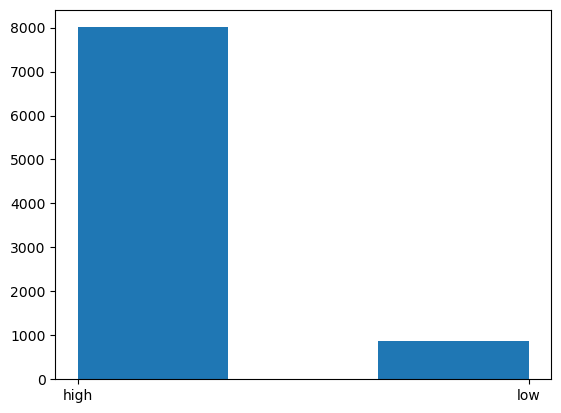

In [191]:
plt.hist(x=data["Rating_category"],bins=3)
plt.show()

# 8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)

In [192]:
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')


<font color="blue"> Converted the column Rating as a numeric datatype

In [193]:
data.head(5)

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high
1,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high
3,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,high


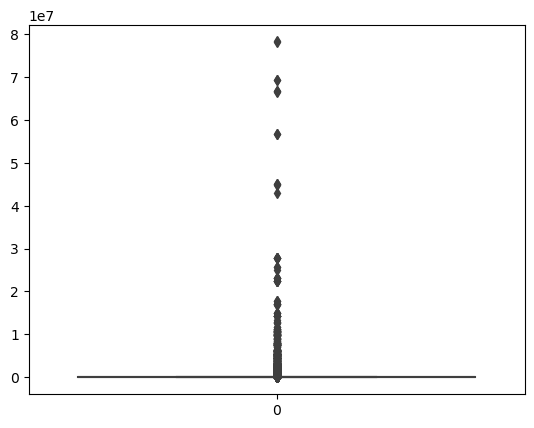

In [194]:
sns.boxplot(data["Reviews"])
plt.show()

In [195]:
data['Reviews'] = np.log(data['Reviews'])


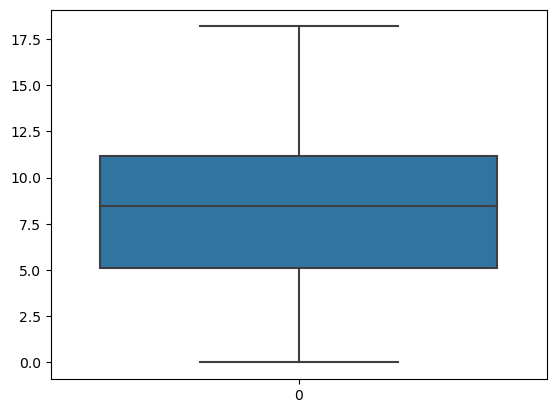

In [196]:
sns.boxplot(data["Reviews"])
plt.show()

# 9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')

In [197]:
data['Size'] = data['Size'].replace({'M':'1e6','K':'1e3','Varies with device':'NaN'},regex= True)
data['Size'] = pd.to_numeric(data['Size'],errors='coerce')

data= data.dropna(subset = ['Size'])
data['Size'].head()


0    191000000.0
1    141000000.0
2      8710000.0
3    251000000.0
4      2810000.0
Name: Size, dtype: float64

<font color="blue">Replaced M with 1 million and K with 1 thousand and dropped the entries "Varies with device".

In [198]:
data.head()

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,5.068904,191000000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high
1,Coloring book moana,ART_AND_DESIGN,6.874198,141000000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,11.379508,8710000.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high
3,Sketch - Draw & Paint,ART_AND_DESIGN,12.281384,251000000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,6.874198,2810000.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,high


In [199]:
data.shape

(7162, 13)

# 10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.


In [200]:
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '100+', '500+', '10+', '1,000,000,000+',
       '5+', '50+', '1+'], dtype=object)

In [201]:
data['Installs'] = data['Installs'].str.replace('[,+]', '')


In [202]:
data['Installs']=data['Installs'].astype(int)
data.head()

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,5.068904,191000000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high
1,Coloring book moana,ART_AND_DESIGN,6.874198,141000000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,11.379508,8710000.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high
3,Sketch - Draw & Paint,ART_AND_DESIGN,12.281384,251000000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,6.874198,2810000.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,high


In [203]:
data.shape

(7162, 13)

<font color="blue"> Removed the unwanted characters in the size column and Converted as a integer datatype.

# 11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.

In [204]:
data['Price'].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49', '$7.49',
       '$1.50', '$19.99', '$15.99', '$33.99', '$39.99', '$2.49', '$4.49',
       '$1.70', '$1.49', '$3.88', '$399.99', '$17.99', '$400.00', '$3.02',
       '$1.76', '$4.84', '$4.77', '$1.61', '$1.59', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$15.46', '$8.99', '$3.04', '$13.99',
       '$4.29', '$3.28', '$4.60', '$1.00', '$10.99', '$2.90', '$1.97',
       '$2.56', '$1.20'], dtype=object)

In [205]:
data['Price'] = data['Price'].str.replace('$', '')


In [206]:
data['Price']=data['Price'].astype(float)
data.head()

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,5.068904,191000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high
1,Coloring book moana,ART_AND_DESIGN,6.874198,141000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,11.379508,8710000.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high
3,Sketch - Draw & Paint,ART_AND_DESIGN,12.281384,251000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,6.874198,2810000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,high


<font color="blue"> Removed the unwanted characters in the price column and Converted as a float datatype.

In [207]:
data.shape

(7162, 13)

# 12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' columns since which are redundant for our analysis)

In [208]:
data.columns

Index(['App', 'Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Rating_category'],
      dtype='object')

In [209]:
Droping_columns = ['App','Genres','Last Updated','Current Ver','Android Ver']
data = data.drop(columns = Droping_columns)

In [210]:
data.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,5.068904,191000000.0,10000,Free,0.0,Everyone,high
1,ART_AND_DESIGN,6.874198,141000000.0,500000,Free,0.0,Everyone,high
2,ART_AND_DESIGN,11.379508,8710000.0,5000000,Free,0.0,Everyone,high
3,ART_AND_DESIGN,12.281384,251000000.0,50000000,Free,0.0,Teen,high
4,ART_AND_DESIGN,6.874198,2810000.0,100000,Free,0.0,Everyone,high


<font color="blue"> Dropped the columns 'App','Genres','Last Updated','Current Ver','Android Ver' which are redundant for the data analysis.

# 13. Encode the categorical columns.

In [211]:
data = pd.get_dummies(data,columns=['Category'],prefix = 'Category')

<font color="blue"> Encoded the data inorder to make machine learning models.

In [212]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Type'] = label_encoder.fit_transform(data['Type'])
data['Content Rating'] = label_encoder.fit_transform(data['Content Rating'])
data['Rating_category'] = label_encoder.fit_transform(data['Rating_category'])

In [213]:
data

,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,5.068904,191000000.0,10000,0,0.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6.874198,141000000.0,500000,0,0.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11.379508,8710000.0,5000000,0,0.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12.281384,251000000.0,50000000,0,0.0,4,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6.874198,2810000.0,100000,0,0.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10830,6.781058,2310000.0,100000,0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10834,1.945910,2610000.0,500,0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10836,3.637586,531000000.0,5000,0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10837,1.386294,3610000.0,100,0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 14. Segregate the target and independent features (Hint: Use Rating_category as the target)

In [214]:
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [215]:
X= data.drop("Rating_category", axis=1)  
y = data["Rating_category"]  

<font color="blue"> Segregated the target which is Rating Category and independant features which are other columns.

# 15. Split the dataset into train and test.

In [216]:
X = data.drop("Rating_category", axis=1)  
y = data["Rating_category"]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

<font color="blue"> 

# 16. Standardize the data, so that the values are within a particular range.

In [217]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [218]:
X_train_scaled

array([[-1.061049  , -0.85050235, -0.16639805, ..., -0.13673108,
        -0.12571981, -0.08263583],
       [-2.05037674,  0.2003577 , -0.16641521, ..., -0.13673108,
        -0.12571981, -0.08263583],
       [ 0.43114006, -0.27895815, -0.1568818 , ..., -0.13673108,
        -0.12571981, -0.08263583],
       ...,
       [ 1.27529629,  1.59836225,  0.02428931, ..., -0.13673108,
        -0.12571981, -0.08263583],
       [ 1.19186348, -0.85569494,  0.02428931, ..., -0.13673108,
        -0.12571981, -0.08263583],
       [-0.02649831,  0.08052874, -0.16546359, ..., -0.13673108,
        -0.12571981, -0.08263583]])

In [219]:
X_test_scaled

array([[ 0.65002242,  0.16041471, -0.16451006, ..., -0.13673108,
        -0.12571981, 12.10128822],
       [ 1.47079023,  2.51705095,  0.02428931, ..., -0.13673108,
        -0.12571981, -0.08263583],
       [-0.87315936, -0.86408297, -0.16632177, ..., -0.13673108,
         7.9541958 , -0.08263583],
       ...,
       [ 1.05325769,  0.2003577 ,  0.02428931, ..., -0.13673108,
        -0.12571981, -0.08263583],
       [ 0.89636872,  0.04058575,  0.02428931, ..., -0.13673108,
        -0.12571981, -0.08263583],
       [-0.46646523, -0.27895815, -0.16622642, ..., -0.13673108,
        -0.12571981, -0.08263583]])

<font color="blue"> Standardized the data in order to maintain the values within a particular range